# Intelligent Control (ECE-DK807)

## Electrical and Computer Engineering Department, University of Patras Greece

**Instructor:** Konstantinos Chazilygeroudis (costashatz@upatras.gr)

## Lab 3

### Gradient Descent

**Adam Optimizer**

1. Initialize $\boldsymbol{m}_0 = \boldsymbol{v}_0 = \boldsymbol{0}, \beta_1,\beta_2\in[0,1), \epsilon>0$
2. $\boldsymbol{g}_{k+1} = \nabla_{\boldsymbol{x}}f(\boldsymbol{x}_k)$
3. $\boldsymbol{m}_{k+1} = \beta_1\boldsymbol{m}_k + (1 - \beta_1)\boldsymbol{g}_{k+1}$
4. $\boldsymbol{v}_{k+1} = \beta_2\boldsymbol{v}_k + (1 - \beta_2)\boldsymbol{g}^2_{k+1}$
5. $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k - \alpha\frac{\frac{\boldsymbol{m}_{k+1}}{1 - \beta_1^{k+1}}}{\sqrt{\frac{\boldsymbol{v}_{k+1}}{1 - \beta_2^{k+1}}}+\epsilon}$
6. $k=k+1$ and back to step 2 until we converge

Let's implement it!

In [1]:
# Let's first import modules
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting
import copy

In [2]:
# First we initialize values
adamM = 0.
adamV = 0.
adamB1n = 0.9
adamB2n = 0.999

def reset_adam():
    global adamM, adamV, adamB1n, adamB2n
    adamM = 0.
    adamV = 0.
    adamB1n = 0.9
    adamB2n = 0.999

# Adam step
# x is the current iterate, x_k
# df is the derivative/gradient of the function we want to optimize
# a is the learning rate
# b1 is the β_1 parameter
# b2 is the β_2 parameter
# eps is the ε parameter
def adam_step(x, df, a = 0.001, b1 = 0.9, b2 = 0.999, eps = 1e-8):
    global adamM, adamV, adamB1n, adamB2n
    ### TO-DO: Implement the steps (1-5) of the Adam algorithm. You need to return x_{k+1}
    ### adamM, adamV global variables are used to store the current m_k and v_k values (updated at each iteration)
    ### adamB1n, adamB2n global variables are used to store β_1^{k+1} and β_2^{k+1} (to avoid having to know the number of iterations)
    ### ANSWER: Insert code here
    g_kp1 = df(x)
    adamM = b1 * adamM + (1 - b1) * g_kp1
    adamV = b2 * adamV + (1 - b2) * np.square(g_kp1)

    # Οι εκθέτες {k + 1} στα β1 & β2, στον παρακάτω τύπο, είναι δυνάμεις!
    adamB1n *= b1
    adamB2n *= b2
    
    x_kp1 = x - a * ((adamM / (1 - adamB1n)) / (np.sqrt(adamV / (1 - adamB2n)) + eps))

    return x_kp1;
    ### END of ANSWER

In [3]:
# First reset Adam
reset_adam()

def simple_f(x):
    return np.square(x)

def simple_df(x):
    return 2. * x

x = 10.
lr = 1e-3
x = adam_step(x, simple_df, lr)
assert(np.isclose(x, 9.999, rtol=1e-4))
x = adam_step(x, simple_df, lr)
assert(np.isclose(x, 9.998, rtol=1e-4))
x = adam_step(x, simple_df, lr)
assert(np.isclose(x, 9.997, rtol=1e-4))
x = adam_step(x, simple_df, lr)
assert(np.isclose(x, 9.996, rtol=1e-4))


reset_adam()

In [4]:
# Let's optimize the Rastrigin function
def f(x):
    ### TO-DO: Implement the Rastrigin function for any dimension as defined in https://www.sfu.ca/~ssurjano/rastr.html
    ### we assume that the input is of the form (dimensions, batch_size)
    ### f(x) should return a (batch_size,) numpy array
    ### ANSWER: Insert code here
    d = len(x) # https://stackoverflow.com/questions/57691690/difference-between-len-and-size
    y = 10 * d + np.sum(np.square(x) - 10 * np.cos(2 * np.pi * x), axis = 0)

    return y;
    ### END of ANSWER

def df(x):
    ### TO-DO: Write the derivative of the Rastrigin function
    ### we assume that the input is of the form (dimensions, batch_size)
    ### df should return a (dimensions, batch_size) numpy array
    ### ANSWER: Insert code here
    dy = 2. * x + 20 * np.pi * np.sin(2 * np.pi * x)

    return dy;
    ### END of ANSWER

In [5]:
x = np.array([[5., 4., 3., 2., 1., 0., -1., -2., -3., -4., -5.]])
assert(np.isclose(f(x), np.array([25., 16., 9., 4., 1., 0., 1., 4., 9., 16., 25.])).all())


In [6]:
x = np.array([[5., 4., 3., 2., 1., 0., -1., -2., -3., -4., -5.]])
assert(np.isclose(df(x), np.array([[10., 8., 6., 4., 2., 0., -2., -4., -6., -8., -10.]])).all())


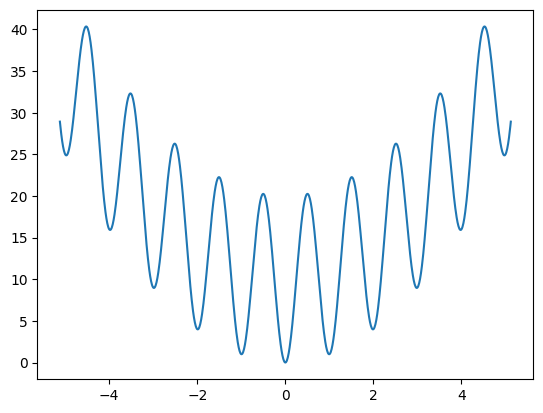

In [7]:
# Let's plot the function
x = np.linspace(-5.12, 5.12, 1000)

plt.close() # close previous
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, f(x.reshape((1, -1))));

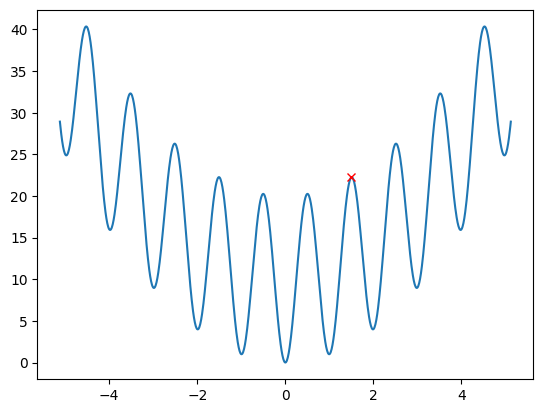

In [8]:
# Let's optimize
# Initial point!
x_init = np.array([[1.5]])

ax.plot(x_init, f(x_init), 'rx')

# Optimization!
x_new = np.copy(x_init)

fig # show figure again with updated point(s)

[[0.99055664]]


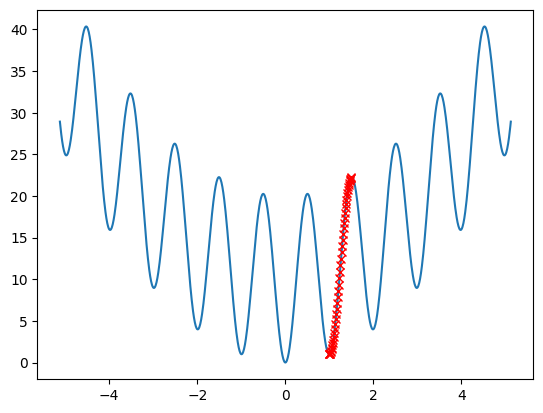

In [9]:
# Let's do a few steps of Adam
lr = 0.01 # learning rate
for i in range(50):
    x_new = adam_step(x_new, df, lr)
    ax.plot(x_new, f(x_new), 'rx')

print(x_new)

fig # show figure again with updated point(s)

### Neural Networks

Now let's learn a nice neural network to approximate our Rastrigin function!

First let's create a dataset. For this we sample $K$ points randomly in the input space of our function. The Rastrigin function is defined in $[-5.12, 5.12]$. So, let's do this:

In [10]:
# Number of points
K = 2000

np.random.seed(2)

### TO-DO: Sample random inputs in [-5.12, 5.12]. We need to sample a dim x K matrix. Store the result in a variable named 'Xn'
### ANSWER: Insert code here
Xn = np.random.uniform(-5.12, 5.12, (1, K))
### END of ANSWER

### TO-DO: Evaluate the function in the sampled points. Store the result in a output_dim x K matrix, and a variable named 'Yn'
### ANSWER: Insert code here
Yn = f(Xn).reshape(1, K)
### END of ANSWER

In [11]:
assert(Xn.shape == (1, 2000))
assert(Yn.shape == (1, 2000))

assert(np.isclose(Xn[0, 0], -0.655, rtol=1e-3))
assert(np.isclose(Yn[0, 0], 16.029, rtol=1e-3))


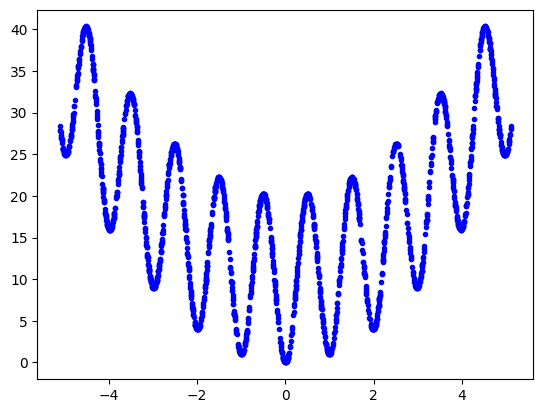

In [12]:
# Let's plot our dataset!
plt.close() # close previous
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(Xn, Yn, 'b.');

In [13]:
# Now let's import pytorch
import torch # For neural networks and automatic differentiation
torch.set_num_threads(1)

# Convert numpy arrays to tensors
# We transpose the arrays because torch assumes (batch_size, dimension)
X = torch.Tensor(Xn.T)
Y = torch.Tensor(Yn.T)

Now we need to make our neural network! Let's create a feedforward neural network with 2 hidden layers (32 and 64 units respectively), let's use `tanh` as the activation functions for the hidden layers, and no activation for the output layer!

In [14]:
# MLP Model
model = torch.nn.Sequential(
    ### TO-DO: Fill up the model with layers and activation functions as described above!
    ### ANSWER: Insert code here
    torch.nn.Linear(1, 32),
    torch.nn.Tanh(),
    torch.nn.Linear(32, 64),
    torch.nn.Tanh(),
    torch.nn.Linear(64, 1)
    ### END of ANSWER
)

In [15]:
params = list(model.named_parameters())
assert(params[0][1].size() == torch.Size([32, 1]))
assert(params[4][1].size() == torch.Size([1, 64]))


Now we need to make a learning loop:

1. Compute model prediction $y_{pred}$ for the input $X$
2. Compute loss given the actual labels $Y$
3. Zero the gradients of the optimizer
4. Automatically compute gradients (`backward` pass)
5. Perform one step of the optimizer

Let's implement those with the Adam optimizer!

In [16]:
# Let's first create a function that computes the predictions of the model
def prediction(model, x):
    ### TO-DO: Return the prediction of the model when given as input X
    ### ANSWER: Insert code here
    return model(x);
    ### END of ANSWER

In [17]:
# Now let's create a function that computes the mean squared error loss
def loss(y_pred, y_true):
    ### TO-DO: Compute and return the mean squared error. Remember that torch assumes (batch_size, dimension) for batched operations.
    ### ANSWER: Insert code here
    mse_loss = torch.mean((y_pred - y_true) ** 2)
    
    return mse_loss.unsqueeze(0);
    ### END of ANSWER

In [18]:
Y_perturbed = Y + 2.
assert(torch.isclose(loss(Y_perturbed, Y), torch.ones(Y.shape[1]) * 4.).all())
Y_perturbed = Y - 2.
assert(np.isclose(loss(Y_perturbed, Y), torch.ones(Y.shape[1]) * 4.).all())

assert(loss(Y_perturbed, Y).size() == torch.Size((1,)))

In [19]:
# Now let's create a function that performs steps 3, 4 and 5 of the above procedure. Assume that the loss value is given as input, and the optimizer is given as input
def update_optimizer(optimizer, loss_value):
    ### ANSWER: Insert code here
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()

    return;
    ### END of ANSWER

In [20]:
tmp_model = copy.deepcopy(model)

# Initialize weights of the model
def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        m.weight.data.fill_(1.)
        m.bias.data.fill_(0.01)

tmp_model.apply(init_weights)

lr = 1e-3
optim = torch.optim.Adam(tmp_model.parameters(), lr=lr) # Adam optimizer

myloss = loss(prediction(tmp_model, X), Y)
assert(update_optimizer(optim, myloss) == None)
myloss = loss(prediction(tmp_model, X), Y)
assert(update_optimizer(optim, myloss) == None)

params = list(tmp_model.parameters())
assert(torch.isclose(params[0].grad, torch.ones_like(params[0].grad) * 0.9356, rtol=1e-4).all())
assert(torch.isclose(params[1].grad, torch.ones_like(params[1].grad) * 0.5833, rtol=1e-4).all())
assert(torch.isclose(params[2].grad, torch.ones_like(params[2].grad) * 0.0147, rtol=1e-4, atol=1e-4).all())
assert(torch.isclose(params[3].grad, torch.ones_like(params[3].grad) * 0.009, rtol=1e-4, atol=1e-4).all())
assert(torch.isclose(params[4].grad, torch.ones_like(params[4].grad) * 128.829, rtol=1e-4).all())
assert(torch.isclose(params[5].grad, torch.ones_like(params[5].grad) * (-44.53), rtol=1e-4).all())

In [21]:
# Let's create the optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Adam optimizer

for t in range(20000):
    y_pred = prediction(model, X)

    myloss = loss(y_pred, Y)
    if t == 0 or (t + 1) % 200 == 0:
        print(t+1, myloss.item() / K)

    update_optimizer(optimizer, myloss)

1 0.23020237731933593
200 0.05851997756958008
400 0.049366592407226566
600 0.042058242797851565
800 0.027839813232421875
1000 0.025268218994140626
1200 0.024813932418823244
1400 0.02460196113586426
1600 0.02449910545349121
1800 0.02439540672302246
2000 0.024260387420654297
2200 0.024073467254638672
2400 0.023817584991455077
2600 0.023461355209350585
2800 0.022996450424194338
3000 0.02244266128540039
3200 0.02188400459289551
3400 0.021336811065673828
3600 0.020841567993164063
3800 0.02032263946533203
4000 0.019700687408447267
4200 0.018922624588012697
4400 0.018010519027709962
4600 0.017139087677001952
4800 0.016170631408691405
5000 0.015306615829467773
5200 0.014368218421936035
5400 0.01343173599243164
5600 0.012579848289489746
5800 0.011947368621826172
6000 0.011451666831970214
6200 0.01102610969543457
6400 0.010656861305236817
6600 0.010327506065368652
6800 0.009922815322875976
7000 0.009524096488952636
7200 0.008381062507629395
7400 0.007111592769622803
7600 0.006226165294647217
780

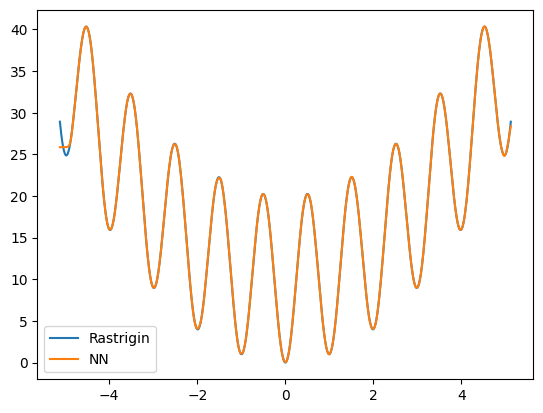

In [22]:
# Let's plot the function
x = np.linspace(-5.12, 5.12, 1000)

plt.close() # close previous
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(X, Y, '.')
ax.plot(x, f(x.reshape((1, -1))), label='Rastrigin')

ax.plot(x, [prediction(model, torch.Tensor(x[i].reshape((1, -1)))).detach().numpy()[0, 0] for i in range(len(x))], label='NN')

ax.legend();

In [23]:
# We can also create our model using the nn.Module class of pytorch
# The model should be identical to the previous one!
class MyModel(torch.nn.Module):
    # constructor
    def __init__(self):
        super().__init__()
        ### TO-DO: Create the 3 linear layers and store them in member variables
        ### ANSWER: Insert code here
        self.linear1 = torch.nn.Linear(1, 32)
        self.linear2 = torch.nn.Linear(32, 64)
        self.linear3 = torch.nn.Linear(64, 1)
        ### END of ANSWER

    # define forward pass
    def forward(self, x):
        ### TO-DO: Perform the forward pass of the neural network; we need to use `torch.nn.functional.tanh` to perform the desired activations
        ### ANSWER: Insert code here
        x = self.linear1(x)
        x = torch.nn.Tanh()(x)
        x = self.linear2(x)
        x = torch.nn.Tanh()(x)
        x = self.linear3(x)
        ### END of ANSWER
        return x

In [24]:
tmp_model = MyModel()

# Initialize weights of the model
def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        m.weight.data.fill_(1.)
        m.bias.data.fill_(0.01)

tmp_model.apply(init_weights)

lr = 1e-3
optim = torch.optim.Adam(tmp_model.parameters(), lr=lr) # Adam optimizer

myloss = loss(prediction(tmp_model, X), Y)
assert(update_optimizer(optim, myloss) == None)
myloss = loss(prediction(tmp_model, X), Y)
assert(update_optimizer(optim, myloss) == None)

params = list(tmp_model.parameters())
assert(torch.isclose(params[0].grad, torch.ones_like(params[0].grad) * 0.9356, rtol=1e-4).all())
assert(torch.isclose(params[1].grad, torch.ones_like(params[1].grad) * 0.5833, rtol=1e-4).all())
assert(torch.isclose(params[2].grad, torch.ones_like(params[2].grad) * 0.0147, rtol=1e-4, atol=1e-4).all())
assert(torch.isclose(params[3].grad, torch.ones_like(params[3].grad) * 0.009, rtol=1e-4, atol=1e-4).all())
assert(torch.isclose(params[4].grad, torch.ones_like(params[4].grad) * 128.829, rtol=1e-4).all())
assert(torch.isclose(params[5].grad, torch.ones_like(params[5].grad) * (-44.53), rtol=1e-4).all())

In [25]:
# Create the new model
model = MyModel()

# Let's create the optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Adam optimizer

for t in range(20000):
    y_pred = prediction(model, X)

    myloss = loss(y_pred, Y)
    if t == 0 or (t + 1) % 200 == 0:
        print(t+1, myloss.item() / K)

    update_optimizer(optimizer, myloss)

1 0.22831045532226563
200 0.05856549072265625
400 0.05180133056640625
600 0.05030257034301758
800 0.034253608703613284
1000 0.026239437103271486
1200 0.025114234924316407
1400 0.024841527938842773
1600 0.024685728073120118
1800 0.024606552124023438
2000 0.02453129768371582
2200 0.02444374084472656
2400 0.024319433212280275
2600 0.024140756607055665
2800 0.023872133255004882
3000 0.023498937606811522
3200 0.02302090835571289
3400 0.02247363471984863
3600 0.021881303787231444
3800 0.021186540603637696
4000 0.020237369537353514
4200 0.01920418167114258
4400 0.018198524475097656
4600 0.01717754554748535
4800 0.01616218185424805
5000 0.015116296768188476
5200 0.01413774871826172
5400 0.013111838340759277
5600 0.012080965042114257
5800 0.01100301456451416
6000 0.010130813598632812
6200 0.009415128707885741
6400 0.008834332466125487
6600 0.008346206665039062
6800 0.007659624099731446
7000 0.006740124225616455
7200 0.00578743314743042
7400 0.005023221015930176
7600 0.004533205509185791
7800 0.

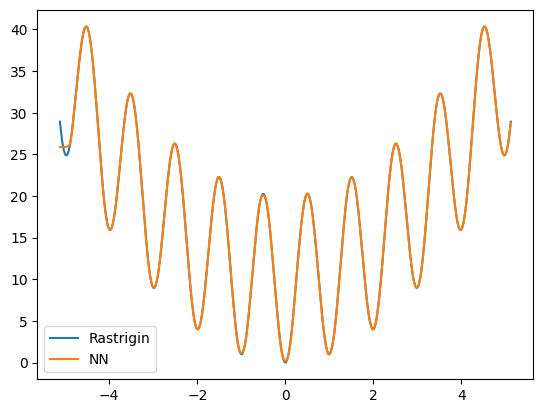

In [26]:
# Let's plot the function
x = np.linspace(-5.12, 5.12, 1000)

plt.close() # close previous
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(X, Y, '.')
ax.plot(x, f(x.reshape((1, -1))), label='Rastrigin')

ax.plot(x, [prediction(model, torch.Tensor(x[i].reshape((1, -1)))).detach().numpy()[0, 0] for i in range(len(x))], label='NN')

ax.legend();

In [27]:
# We can also use pytorch's built-in functions for learning with batches
from torch.utils.data import Dataset, DataLoader

# We create a custom dataset class
class NumpyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(X) # Convert NumPy to Tensor
        self.y = torch.Tensor(y) # Convert NumPy to Tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [28]:
# Let's create the actual dataset and dataloader (aka the worker that makes the batches)
dataset = NumpyDataset(Xn.T, Yn.T)

# We want a batch size of 32, and we randomly shuffle the samples
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [29]:
# Create the new model
model = MyModel()

# Let's create the optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Adam optimizer

# Training Loop
num_epochs = 200
for epoch in range(num_epochs):
    epoch_loss = 0.0

    for batch_X, batch_y in dataloader:
        outputs = prediction(model, batch_X)

        myloss = loss(outputs, batch_y)

        update_optimizer(optimizer, myloss)

        epoch_loss += myloss.item()

    # if epoch == 0 or (epoch + 1) % 20 == 0:
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(dataloader):.4f}")


Epoch 1/200, Loss: 257.6379
Epoch 2/200, Loss: 106.8665
Epoch 3/200, Loss: 99.0691
Epoch 4/200, Loss: 82.5180
Epoch 5/200, Loss: 61.2307
Epoch 6/200, Loss: 53.4727
Epoch 7/200, Loss: 50.9604
Epoch 8/200, Loss: 50.5185
Epoch 9/200, Loss: 50.1835
Epoch 10/200, Loss: 49.8265
Epoch 11/200, Loss: 49.9878
Epoch 12/200, Loss: 50.0081
Epoch 13/200, Loss: 49.9563
Epoch 14/200, Loss: 49.8563
Epoch 15/200, Loss: 49.7355
Epoch 16/200, Loss: 49.7705
Epoch 17/200, Loss: 49.6641
Epoch 18/200, Loss: 49.8018
Epoch 19/200, Loss: 49.7348
Epoch 20/200, Loss: 49.7780
Epoch 21/200, Loss: 49.7302
Epoch 22/200, Loss: 49.9417
Epoch 23/200, Loss: 49.7993
Epoch 24/200, Loss: 49.8176
Epoch 25/200, Loss: 49.8781
Epoch 26/200, Loss: 49.7680
Epoch 27/200, Loss: 49.8200
Epoch 28/200, Loss: 49.7305
Epoch 29/200, Loss: 49.8008
Epoch 30/200, Loss: 49.6485
Epoch 31/200, Loss: 49.8454
Epoch 32/200, Loss: 49.6760
Epoch 33/200, Loss: 50.0264
Epoch 34/200, Loss: 49.7400
Epoch 35/200, Loss: 49.7403
Epoch 36/200, Loss: 49.8742

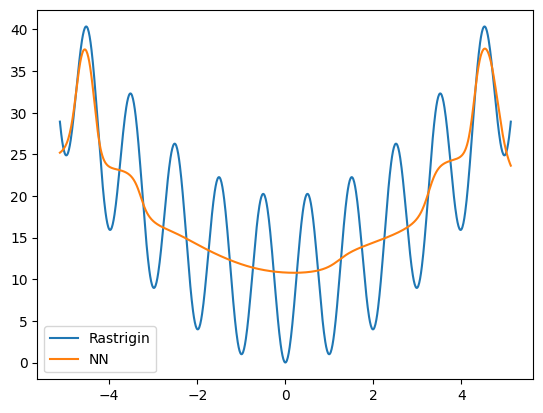

In [30]:
# Let's plot the function
x = np.linspace(-5.12, 5.12, 1000)

plt.close() # close previous
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(X, Y, '.')
ax.plot(x, f(x.reshape((1, -1))), label='Rastrigin')

ax.plot(x, [prediction(model, torch.Tensor(x[i].reshape((1, -1)))).detach().numpy()[0, 0] for i in range(len(x))], label='NN')

ax.legend();